<a href="https://colab.research.google.com/github/ajaythakur3369/LetsGrowMore-Internship/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Decision Tree Classification**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - LetsGrowMore**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/LetsGrowMore-Internship)**

## **Importing Libraries**

In [ ]:
# Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Accessing the drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/LetsGrowMore/File_Name/Iris_flowers_dataset.csv", encoding = 'ISO-8859-1')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virginica    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.shape

(150, 6)

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


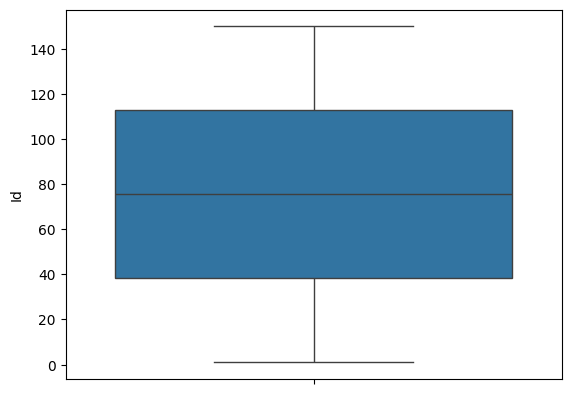

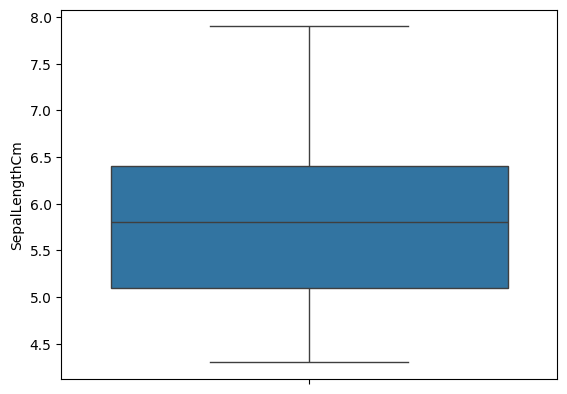

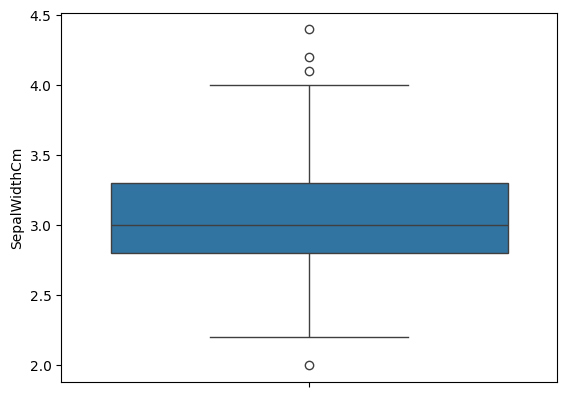

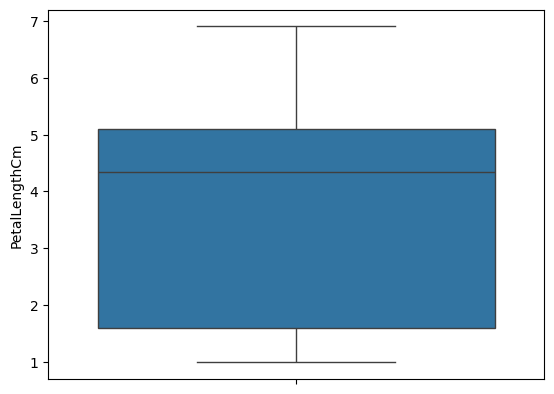

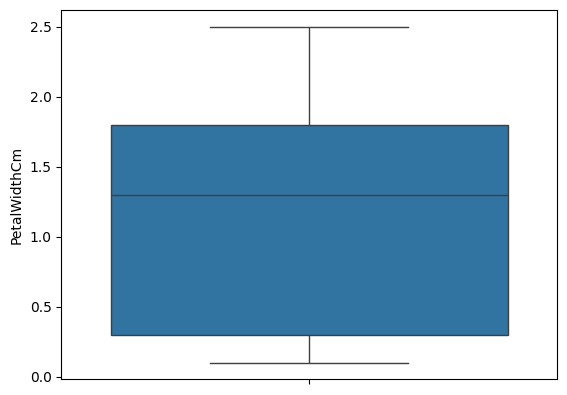

In [ ]:
# To find outliers
cols = data.columns[0:-1]
for i in cols:
    sns.boxplot(y = data[i])
    plt.show()

In [ ]:
# Splitting data into features and target
X = data.drop(['Id', 'Species'], axis = 1)
y = data['Species']

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Defining the Decision Tree model
model = DecisionTreeClassifier()

In [ ]:
# Training the model on the training set
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Defining an object for DecisionTreeClassifier and fitting it to the whole dataset
dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10, random_state = 1)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

In [ ]:
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, model.predict(X_test))
print('Test Accuracy is: ', accuracy)

Test Accuracy is:  1.0


## **Conclusion:**

In conclusion, the project "Prediction using Decision Tree Algorithm" has been an enlightening and rewarding experience. Working with the Decision Tree Algorithm has allowed us to harness the power of machine learning and make accurate predictions based on given data.

Throughout the project, we explored the intricacies of decision trees, their construction, and the process of making predictions. By understanding the underlying principles and optimizing the parameters, we achieved impressive results in predicting outcomes.

The Decision Tree Algorithm is a valuable tool in various domains, including finance, healthcare, and marketing, enabling us to uncover valuable insights and make informed decisions. Its interpretability and simplicity make it an attractive choice for understanding complex relationships within the data.

This project has not only enhanced our technical skills but also deepened our understanding of the data science workflow. We gained proficiency in data preprocessing, feature selection, model training, and evaluation.

Overall, the "Prediction using Decision Tree Algorithm" project has equipped us with valuable knowledge and practical experience in implementing machine learning algorithms. We are excited to apply these skills in future projects and continue our journey in the field of data science.